In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date, datetime

start_year = 2005      # Année de début de période d'étude
end_year   = 2021      # Année de fin de période d'étude   
chk        = False     # Affichage de log des checks
sampled    = True      # Travail sur données samplées de df_all

df_all, dic_usagers, dic_caract, dic_lieux, dic_vehic = pt.get_work_df(start_year, end_year, sampled, chk)

### Transformation des  -1 (non renseigné) en *Null*

In [2]:
# df_all = pt.manage_not_specified(df_all)

### Représentation graphique des *Null*

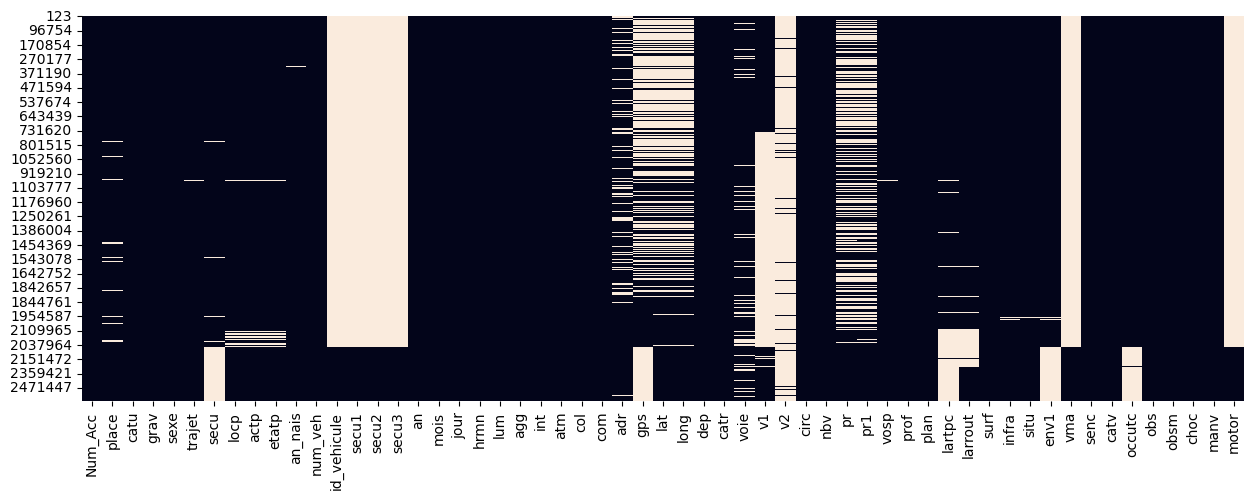

In [3]:
df_sample = df_all.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

plt.figure(figsize=(15,5))
ax = sns.heatmap(df_sample.isna(), cbar=False);

### Suppression de variables avec plus de 8 % de *Null*

In [4]:
df_all = pt.rmv_col_too_much_null(df_all, 0.08, False)

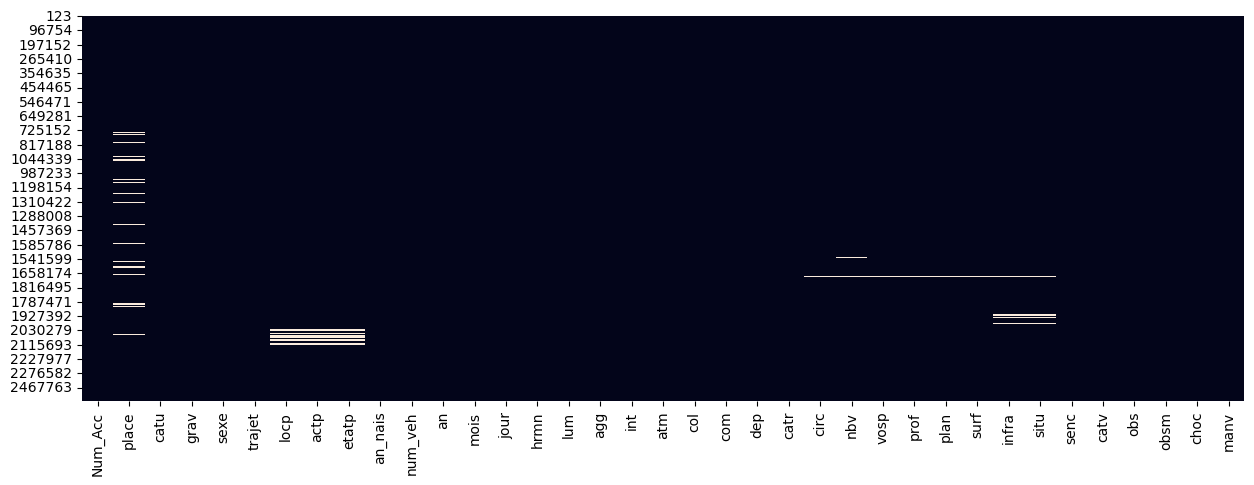

In [5]:
df_sample = df_all.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

plt.figure(figsize=(15,5))
ax = sns.heatmap(df_sample.isna(), cbar=False);

### Remplacement des *Null* restants par le mode

In [6]:
# var pour lesquelles -1 = Non renseigné

['lum', 'agg', 'int', 'atm', 'col', 'catr', 'circ', 'vosp', 'prof', 'plan', 'surf', 'infra', 'situ', 'senc', 'catv']

['lum',
 'agg',
 'int',
 'atm',
 'col',
 'catr',
 'circ',
 'vosp',
 'prof',
 'plan',
 'surf',
 'infra',
 'situ',
 'senc',
 'catv']

In [7]:
# df_all = pt.replace_null_mode(df_all, True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1150030 to 1306830
Data columns (total 37 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Num_Acc  20000 non-null  int64 
 1   place    19114 non-null  Int64 
 2   catu     20000 non-null  Int64 
 3   grav     20000 non-null  Int64 
 4   sexe     20000 non-null  Int64 
 5   trajet   19997 non-null  Int64 
 6   locp     19537 non-null  Int64 
 7   actp     19536 non-null  object
 8   etatp    19536 non-null  Int64 
 9   an_nais  19961 non-null  Int64 
 10  num_veh  20000 non-null  object
 11  an       20000 non-null  Int64 
 12  mois     20000 non-null  Int64 
 13  jour     20000 non-null  Int64 
 14  hrmn     20000 non-null  object
 15  lum      20000 non-null  Int64 
 16  agg      20000 non-null  Int64 
 17  int      20000 non-null  Int64 
 18  atm      19999 non-null  Int64 
 19  col      20000 non-null  Int64 
 20  com      20000 non-null  object
 21  dep      20000 non-null  ob

In [8]:
# Lignes contenant au moins une valeur manquante
# df_all[df_all.isna().any(axis = 1)]

### Nettoyage de la colonne *dep* (code département)

In [9]:
df_all = pt.clean_col_dep(df_all, True)

Départements avant nettoyage : 
['01' '010' '02' '020' '03' '030' '04' '040' '05' '050' '06' '060' '07'
 '070' '08' '080' '09' '090' '1' '10' '100' '11' '110' '12' '120' '13'
 '130' '14' '140' '15' '150' '16' '160' '17' '170' '18' '180' '19' '190'
 '2' '20' '201' '202' '21' '210' '22' '220' '23' '230' '24' '240' '25'
 '250' '26' '260' '27' '270' '28' '280' '29' '290' '2A' '2B' '3' '30'
 '300' '31' '310' '32' '320' '33' '330' '34' '340' '35' '350' '36' '360'
 '37' '370' '38' '380' '39' '390' '4' '40' '400' '41' '410' '42' '420'
 '43' '430' '44' '440' '45' '450' '46' '460' '47' '470' '48' '480' '49'
 '490' '5' '50' '500' '51' '510' '52' '520' '53' '530' '54' '540' '55'
 '550' '56' '560' '57' '570' '58' '580' '59' '590' '6' '60' '600' '61'
 '610' '62' '620' '63' '630' '64' '640' '65' '650' '66' '660' '67' '670'
 '68' '680' '69' '690' '7' '70' '700' '71' '710' '72' '720' '73' '730'
 '74' '740' '75' '750' '76' '760' '77' '770' '78' '780' '79' '790' '8'
 '80' '800' '81' '810' '82' '820' '83'

### Création et catégorisation de la variable *age*  - suppression de *an_nais*

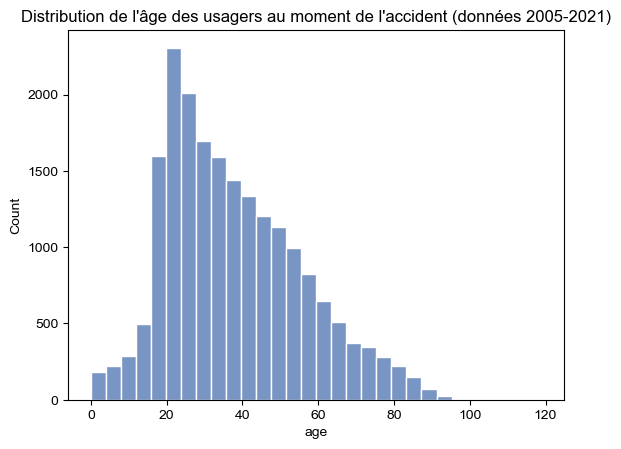

In [10]:
df_all = pt.create_col_age(df_all)

df_all = pt.rmv_outliers('an_nais', df_all)
df_all = pt.rmv_outliers('age', df_all)

df_all = df_all.drop(columns=['an_nais'], axis=1)

plt.title(f"Distribution de l'âge des usagers au moment de l'accident (données {start_year}-{end_year})")
sns.set_theme(style="ticks")
sns.histplot(data=df_all, x="age", bins=30);

###  Création de *date* - suppression de *an*, *mois*, *jour*

In [11]:
df_all = pt.create_col_date(df_all)

### Création de *joursem* (jour de la semaine)

In [ ]:
df_all = pt.create_col_joursem(df_all)

vendredi    3309
jeudi       2977
samedi      2940
mercredi    2853
mardi       2821
lundi       2667
dimanche    2433
Name: joursem, dtype: int64


<BarContainer object of 7 artists>

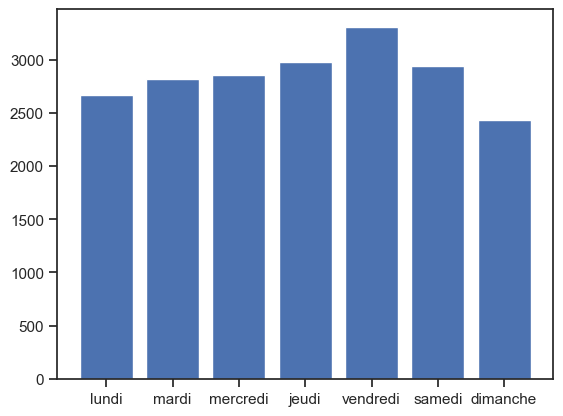

In [52]:
tmp = df_all.joursem.value_counts()
print(tmp)
['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']

plt.bar(['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche'], 
        height = [tmp['lundi'], tmp['mardi'], tmp['mercredi'], tmp['jeudi'], tmp['vendredi'], tmp['samedi'], tmp['dimanche']])


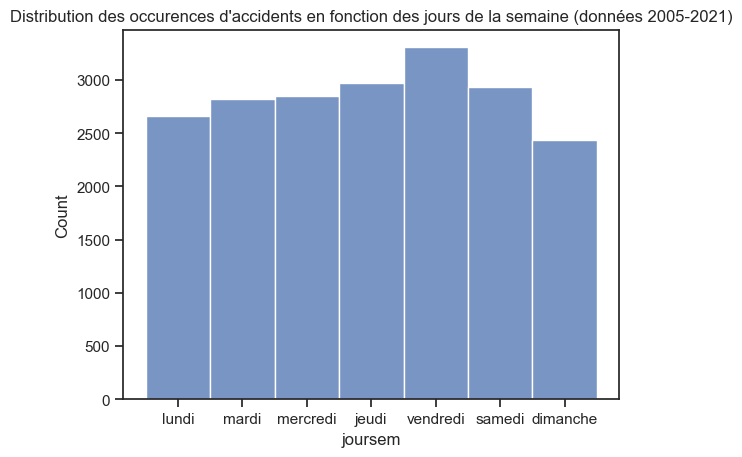

In [36]:
plt.title(f"Distribution des occurences d'accidents en fonction des jours de la semaine (données {start_year}-{end_year})")

df_tmp = df_all
df_tmp['joursem'] = pd.Categorical(df_all['joursem'], ['lundi','mardi','mercredi','jeudi', 'vendredi', 'samedi', 'dimanche'])

sns.set_theme(style="ticks")
sns.histplot(data=df_tmp, x="joursem");

### hrmn


In [13]:
def format_hour(s):
    if len(s) == 4:
        hr = s[0:2] if len(s[0:2]) == 2 else f"0{s[0:2]}"
        mn = s[3:4] if len(s[3:4]) == 2 else f"0{s[3:4]}"
        return datetime.strptime(f"{hr}:{mn}", "%H:%M").time() 

# Suppression des lignes avec heure = None
df_all['heure'] = [format_hour(str(h)) for h in df_all.hrmn]
df_all = df_all.drop(columns=['hrmn'], axis=1)

# df_all[df_all['heure'] == None]

# df_all = df_all.drop(df_all[df_all['heure'] == None].index)

# df_all['heure'].unique()
# stats_heure = df_all['heure'].value_counts()
# type(stats_heure)
# ax = sns.histplot(stats_heure, bins=300)
# ax.set_xlim(0,500)

# sns.histplot(df_all.heure);
# plt.hist(df_all.heure)

### Variables avec nombreuses modalités

In [14]:
# df_all = df_all.drop(columns=['com'], axis=1)

# fig, axs = plt.subplots(5, 4)
# fig.set_size_inches(15, 20)

k = 0
for col in df_all.columns:
    if not (col in ['Num_Acc', 'an_nais', 'num_veh', 'date', 'age', 'heure', 'com']):
        mods = df_all[col].unique()
        if len(mods) >= 8:
            print(f"{col}\t: {mods}")
#             ax = axs[k//4-1,k%4-1]
#             ax.set_title(col)
#             ax.yaxis.set_visible(False)
#             ax.hist(df_all[col], bins=len(df_all[col].unique()))          
            
#             sns.set_style('ticks')
        
#             sns.histplot(data=df_all, x=col, bins=len(df_all[col].unique()), ax=ax, hue='grav', multiple="stack")
#             sns.countplot(data=df_all, x=col, hue='grav', ax=ax)
            k += 1

place	: <IntegerArray>
[1, 2, 3, 0, <NA>, 5, 10, 8, 4, 7, 6, 9]
Length: 12, dtype: Int64
trajet	: <IntegerArray>
[0, 1, 5, 4, 3, 9, 2, -1, <NA>]
Length: 9, dtype: Int64
locp	: <IntegerArray>
[0, -1, <NA>, 4, 1, 2, 3, 6, 9, 8, 5, 7]
Length: 12, dtype: Int64
actp	: ['0' ' -1' nan '3' '2' '9' '1' '4' '5' 'A' 'B' '6' '7']
int	: <IntegerArray>
[3, 1, 2, 9, 4, 6, 7, 5, 8, 0]
Length: 10, dtype: Int64
atm	: <IntegerArray>
[1, 3, 2, 8, 4, 9, 7, 6, 5, <NA>]
Length: 10, dtype: Int64
col	: <IntegerArray>
[3, 1, 4, 6, 5, 7, 2, -1]
Length: 8, dtype: Int64
dep	: ['67' '78' '37' '93' '06' '90' '18' '75' '46' '54' '94' '44' '12' '92'
 '83' '63' '13' '33' '59' '28' '35' '29' '95' '50' '03' '974' '64' '77'
 '17' '40' '36' '25' '972' '27' '31' '39' '68' '09' '80' '971' '43' '89'
 '73' '82' '85' '01' '61' '11' '38' '42' '973' '88' '69' '49' '76' '21'
 '22' '66' '62' '34' '07' '10' '60' '87' '86' '71' '91' '74' '16' '79'
 '51' '41' '56' '72' '14' '26' '57' '30' '20A' '15' '84' '976' '45' '52'
 '32' '988' '4

In [15]:
fd_usa = pt.preproc_usagers(dic_usagers, True)



somme des lignes 'dic': 2509620
nombre de lignes 'df' : 2509620
nombre de doublons avant traîtement : 2858
nombre de doublons avant traîtement : 0


In [16]:
fd_usa[fd_usa.grav==2].shape[0] 

67049

In [17]:
df_all.nbv.value_counts(normalize=True) # On ne garde que <= 6, le reste ne représente que 0.7%
# df_all[df_all.nbv > 6].shape[0]/df_all.shape[0]

df_all.surf.value_counts(normalize=True) # Transformer les 0 en -1

df_all.catv.value_counts(normalize=True) # on ne garde que 7:VL, 33:Moto>125cm3, 10:VU, 2:Cyclo<50cm3, 30:Scooter<50cm3

df_all.obs.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

df_all.obsm.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

df_all.choc.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

df_all.manv.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

# print(df_all[df_all.grav==2].obs.value_counts(normalize=True).head())
# print(df_all[df_all.grav!=2].obs.value_counts(normalize=True).head())



1     0.452618
2     0.112217
15    0.082212
0     0.074811
13    0.042106
17    0.032605
23    0.026954
9     0.022153
19    0.020103
16    0.019803
14    0.018153
21    0.018153
5     0.010352
4     0.010202
10    0.009201
11    0.008451
12    0.007251
3     0.006051
20    0.005101
18    0.005051
26    0.004701
7     0.003551
24     0.00275
6       0.0025
22      0.0022
8       0.0004
25     0.00025
-1      0.0001
Name: manv, dtype: Float64

### Volume des données

In [18]:
# nb de lignes et colonnes de chaque DataFrame

dic = {'caract' : dic_caract, 'lieux' : dic_lieux, 'usagers': dic_usagers, 'vehic' : dic_vehic}

for key in dic.keys() : 
    print(f"\n{key} : \n")
    nb_lin = []
    nb_col = []
   
    for year in range(start_year, end_year+1):
        dic_data = dic[key]
        df = dic_data[year]
        nb_lin.append(df.shape[0])
        nb_col.append(df.shape[1])
        print(f'{key} {year} : {df.shape[1]} colonnes x {df.shape[0]} lignes')

    print(f"\nnombre de lignes min : {min(nb_lin)}")    
    print(f"nombre de lignes max : {max(nb_lin)}")    


caract : 

caract 2005 : 16 colonnes x 87026 lignes
caract 2006 : 16 colonnes x 82993 lignes
caract 2007 : 16 colonnes x 83850 lignes
caract 2008 : 16 colonnes x 76767 lignes
caract 2009 : 16 colonnes x 74409 lignes
caract 2010 : 16 colonnes x 69379 lignes
caract 2011 : 16 colonnes x 66974 lignes
caract 2012 : 16 colonnes x 62250 lignes
caract 2013 : 16 colonnes x 58397 lignes
caract 2014 : 16 colonnes x 59854 lignes
caract 2015 : 16 colonnes x 58654 lignes
caract 2016 : 16 colonnes x 59432 lignes
caract 2017 : 16 colonnes x 60701 lignes
caract 2018 : 16 colonnes x 57783 lignes
caract 2019 : 15 colonnes x 58840 lignes
caract 2020 : 15 colonnes x 47744 lignes
caract 2021 : 15 colonnes x 56518 lignes

nombre de lignes min : 47744
nombre de lignes max : 87026

lieux : 

lieux 2005 : 18 colonnes x 87026 lignes
lieux 2006 : 18 colonnes x 82993 lignes
lieux 2007 : 18 colonnes x 83850 lignes
lieux 2008 : 18 colonnes x 76767 lignes
lieux 2009 : 18 colonnes x 74409 lignes
lieux 2010 : 18 colon

### Analyse intercorrelations between variables

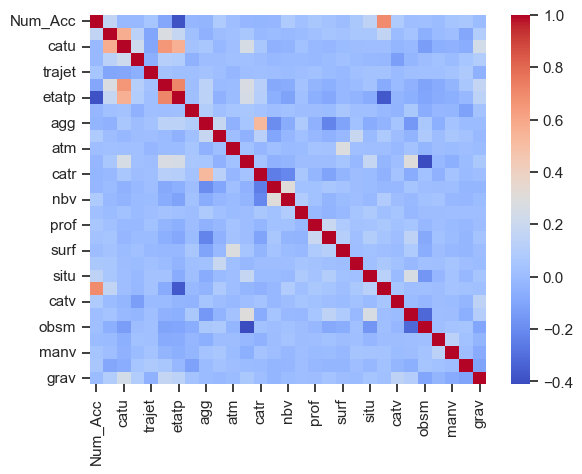

In [19]:
target = df_all['grav']
data = df_all.drop(columns=['grav'], axis=1)
# set 'grav' as last column of data
data['grav'] = target

data_sample = data.sample(10000)
corr = data_sample.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm');
# sns.clustermap(corr, annot=False, cmap='coolwarm');

### Evolution de gravité *Blessé hospitalisé* en 2019?

In [20]:
tue     = []
bless_l = []
bless_h = []
indemne = []
y_m     = []
years   = range(start_year, end_year+1)
months  = range(1, 12)

import datetime

for year in years:
    for month in months:
        df = df_all[(df_all.date >= f'{year}-{month}-01') & (df_all.date <= f'{year}-{month+1}-1')]
        tue.append(df.grav.value_counts(normalize=True)[2])
        bless_h.append(df.grav.value_counts(normalize=True)[3])
        bless_l.append(df.grav.value_counts(normalize=True)[4])
        indemne.append(df.grav.value_counts(normalize=True)[1])
        y_m.append(datetime.datetime(year, month, 1))

    
data = pd.DataFrame({'Tué':tue, 'Blessé hospitalisé':bless_h, 'Blessé léger':bless_l, 'Indemne':indemne, 'time':y_m})
data = data.set_index('time')

# fig, ax = plt.figure(figsize=(10, 6))
sns.set_theme(style="white", palette=None)
ax = sns.lineplot(data=data, palette=['red','orange','green','gray']) #.set_title("Evolution des proportions des niveaux de gravité en fonction du temps")
ax.axes.set_title("Evolution des proportions des niveaux de gravité en fonction du temps",fontsize=25)

plt.axvline(datetime.datetime(2018, 1, 1))
plt.axvline(datetime.datetime(2020, 4, 1), linestyle='--')
plt.legend(loc='upper left');

KeyError: 2

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")


sns.pairplot(df_all, hue="grav")